##Shailendra Sen
##Task 1

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting the distribution of scores

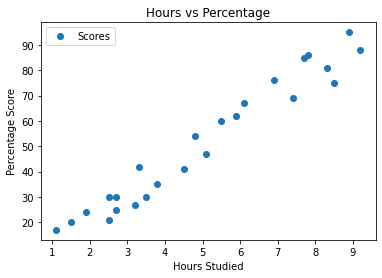

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [9]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


### Plotting the regression line

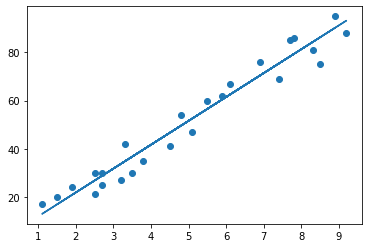

In [16]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### making the predictions

In [19]:

print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted

In [20]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
df.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,41.600000,42.651852
std,22.255336,24.407192
min,20.000000,16.884145
25%,27.000000,26.794801
50%,30.000000,33.732261
75%,62.000000,60.491033
max,69.000000,75.357018


### predicting for the test dataset

In [22]:
pred = regressor.predict(x_test.reshape(-1,1))
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [23]:
pred1 = pd.DataFrame(pred)
pred1

,0
0,16.884145
1,33.732261
2,75.357018
3,26.794801
4,60.491033


### plotting the graph on test data

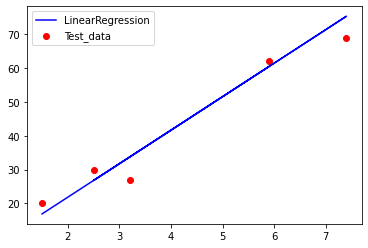

In [24]:
plt.plot(x_test,pred,label='LinearRegression',color = 'b')
plt.scatter(x_test,y_test,label = 'Test_data',color = 'r')
plt.legend()
plt.show()

In [25]:
regressor.predict([[9.25]])

array([93.69173249])

### Evaluating the model

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
